<a href="https://colab.research.google.com/github/WulanMPF/ML_Wulan-Maulidya_27/blob/main/Jobsheet%204%20(Klasifikasi)/Tugas-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 2
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

**Connect to Drive**

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [129]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Load Image**

In [130]:
# Image directories
train_dir = "/content/drive/MyDrive/ML/week 4/images/training"
test_dir = "/content/drive/MyDrive/ML/week 4/images/test"

**Membuat Daftar Path**

In [131]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

**Load Data Training**

In [133]:
train_img = load_dataset(train_dir)

**Load Data Test**

In [134]:
test_img = load_dataset(test_dir)

**Cek List**

In [135]:
train_img[0]

(array([[[254, 254, 252],
         [254, 254, 252],
         [254, 254, 252],
         ...,
         [ 32,  41,  38],
         [ 30,  39,  36],
         [ 29,  38,  35]],
 
        [[254, 254, 252],
         [254, 254, 252],
         [254, 254, 252],
         ...,
         [ 31,  40,  37],
         [ 31,  40,  37],
         [ 30,  39,  36]],
 
        [[254, 254, 252],
         [254, 254, 252],
         [254, 254, 252],
         ...,
         [ 30,  39,  36],
         [ 31,  40,  37],
         [ 31,  40,  37]],
 
        ...,
 
        [[ 82,  88,  74],
         [ 72,  78,  64],
         [ 68,  74,  60],
         ...,
         [ 40,  44,  30],
         [ 38,  44,  34],
         [ 38,  44,  34]],
 
        [[ 80,  86,  72],
         [ 70,  76,  62],
         [ 66,  72,  58],
         ...,
         [ 36,  40,  26],
         [ 35,  41,  31],
         [ 35,  41,  31]],
 
        [[ 79,  85,  71],
         [ 69,  75,  61],
         [ 65,  71,  57],
         ...,
         [ 37,  41,  27],
  

**Cek Random Ukuran Data**

In [137]:
pick_random = np.random.randint(0, len(train_img))

print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 128
(737, 1024, 3)


**Tampilkan Gambar**

In [138]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

**Tampilkan Acak**

Shape	: (700, 1280, 3)
Label	: day


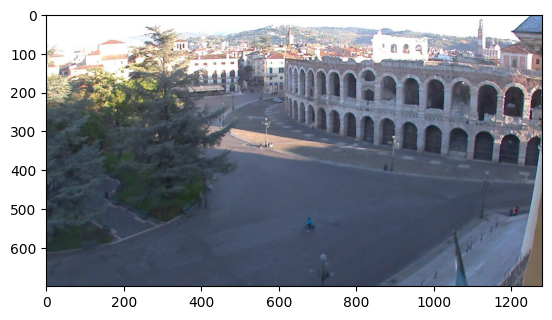

In [139]:
random_img_viz(train_img)

**Standarkan Ukuran Data**

In [140]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

**Encode**

In [141]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

**Standarkan Ukuran & Encode**

In [142]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

**Pra Pengolahan Pada Data Training**

In [143]:
train_std_img_list = preprocess(train_img)

**Pra Pengolahan Pada Data Test**

In [144]:
test_std_img_list = preprocess(test_img)

**Cek Random Ukuran Data**

In [146]:
pick_random = np.random.randint(0, len(train_std_img_list))

print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 30
(600, 1100, 3)


**Tampilkan Acak**

Shape	: (600, 1100, 3)
Label	: 1


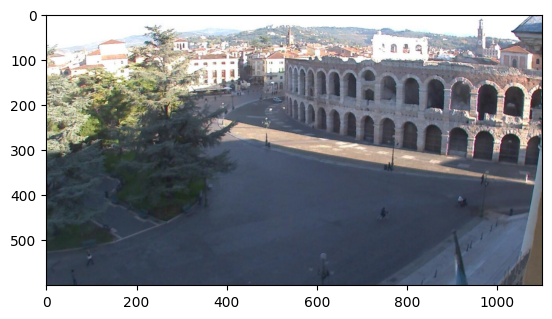

In [147]:
random_img_viz(train_std_img_list)

**Ekstraksi Fitur Histogram**

In [148]:
def brightness_histogram(image):
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Hitung histogram grayscale
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # Nilai rata-rata kecerahan
    avg_brightness = np.mean(gray)

    return hist, avg_brightness

**Ekstraksi Fitur AVG Kecerahan**

In [149]:
def extract_features(img_list):
    features = []
    labels = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Ekstraksi histogram dan rata-rata kecerahan
        _, avg_brightness = brightness_histogram(image)

        # Simpan nilai rata-rata kecerahan sebagai fitur
        features.append([avg_brightness])
        labels.append(label)

    return np.array(features), np.array(labels)

**Ekstraksi Fitur Data Training**

In [150]:
train_features, train_labels = extract_features(train_std_img_list)

**Ekstraksi Fitur Data Test**

In [151]:
test_features, test_labels = extract_features(test_std_img_list)

**Split Data**

In [152]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

**Cek Data**

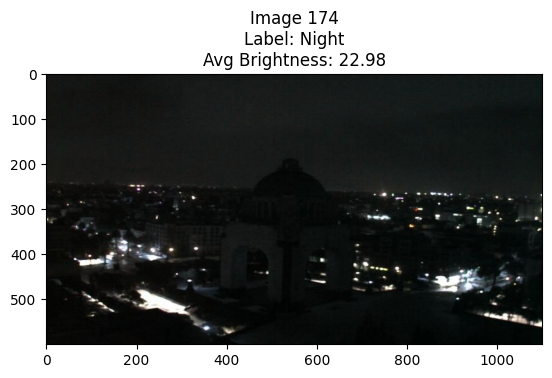

In [154]:
# Pengecekan gambar secara acak
def check_random_brightness(img_list):
    rand_num = np.random.randint(0, len(img_list))
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]

    # Konversi gambar ke RGB jika diperlukan
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    hist, avg_brightness = brightness_histogram(img_rgb)

    # Tampilkan gambar
    plt.imshow(img_rgb)
    plt.title(f'Image {rand_num + 1}\nLabel: {"Day" if label == 1 else "Night"}\nAvg Brightness: {avg_brightness:.2f}')
    plt.show()

# Pengecekan pada gambar acak
check_random_brightness(train_std_img_list)

**Klasifikasi dengan SVM**

In [155]:
# Membuat model SVM
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Prediksi pada data training
train_preds = clf.predict(X_train)

# Prediksi pada data test
test_preds = clf.predict(test_features)

**Visualisasi Prediksi**

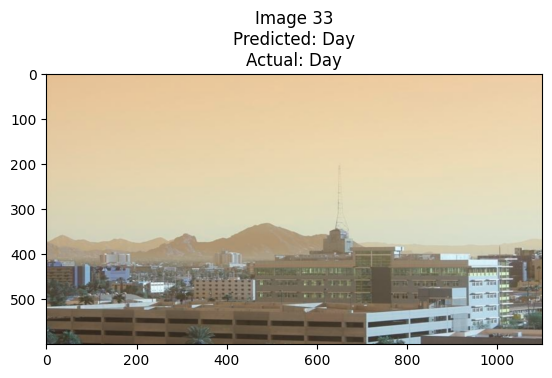

In [156]:
# Fungsi visualisasi prediksi beserta gambar
def visualize_prediction(img_list, X_train, y_train, train_preds):
    rand_idx = np.random.randint(0, len(X_train))  # Pilih gambar acak

    # Ambil gambar asli dari list dan prediksi
    img = img_list[rand_idx][0]
    actual_label = y_train[rand_idx]
    predicted_label = train_preds[rand_idx]

    # Konversi gambar ke RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar dengan label asli dan prediksi
    plt.imshow(img_rgb)
    plt.title(f'Image {rand_idx + 1}\nPredicted: {"Day" if predicted_label == 1 else "Night"}\nActual: {"Day" if actual_label == 1 else "Night"}')
    plt.show()

# Panggil fungsi untuk visualisasi prediksi
visualize_prediction(train_std_img_list, X_train, y_train, train_preds)

**Evaluasi**

In [157]:
# Hitung akurasi pada data training
train_acc = accuracy_score(y_train, train_preds)

# Prediksi menggunakan data test
test_preds = clf.predict(test_features)

# Hitung akurasi pada data test
test_acc = accuracy_score(test_labels, test_preds)

# Tampilkan hasil akurasi
print(f'Accuracy on Training Data: {train_acc * 100:.2f}%')
print(f'Accuracy on Test Data: {test_acc * 100:.2f}%')

Accuracy on Training Data: 97.92%
Accuracy on Test Data: 94.38%
